# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV247"

In [3]:
LV_AXIS_THRESHOLD = 1.0 # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP033135, SRP055569, SRP057248, SRP057196, SRP057205, SRP040550, SRP042161, SRP025982, SRP060416, SRP007359, SRP049097, SRP055153, SRP036769, SRP042043, SRP066834, SRP045573, SRP050596, SRP043221, SRP009266, SRP058773, SRP007947, SRP019807, SRP015449, SRP059775, SRP031507, SRP050499, SRP059957, SRP007461, SRP041751, SRP017575, SRP049004, SRP058351, SRP003227, SRP009862, SRP022892, SRP056295, SRP008218, SRP058740, SRP064464, SRP059379, SRP024268, SRP041100, SRP063493, SRP014320, SRP065812, SRP003726, SRP058856, SRP015678, SRP057852, SRP021193, SRP018403, SRP034666, SRP047299, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (49 != 53)
  warnings.warn(


In [18]:
lv_data.shape

(7529, 88)

In [19]:
lv_data.head()

cell type  \
project   run                                                  
SRP033135 SRR1032910  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032911  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032912  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032913  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032914  Human Skeletal Muscle Myoblasts (HSMM)   

                     hour post serum-switch debris control well cells in well  \
project   run                                                                   
SRP033135 SRR1032910                      0  FALSE        FALSE             1   
          SRR1032911                      0  FALSE        FALSE             1   
          SRR1032912                      0  FALSE        FALSE             1   
          SRR1032913                      0  FALSE        FALSE             2   
          SRR1032914                      0  FALSE        FALSE             1   

                     library protocol human cell line strain organism tissue  \
project   run                                                                  
SRP033135 SRR1032910      Single-cell             NaN    NaN      NaN    NaN   
          SRR1032911      Single-cell             NaN    NaN      NaN    NaN   
          SRR1032912      Single-cell             NaN    NaN      NaN    NaN   
          SRR1032913      Single-cell             NaN    NaN      NaN    NaN   
          SRR1032914      Single-cell             NaN    NaN      NaN    NaN   

                      ... time point cell marker clone  \
project   run         ...                                
SRP033135 SRR1032910  ...        NaN         NaN   NaN   
          SRR1032911  ...        NaN         NaN   NaN   
          SRR1032912  ...        NaN         NaN   NaN   
          SRR1032913  ...        NaN         NaN   NaN   
          SRR1032914  ...        NaN         NaN   NaN   

                     collection site and cell type bacterial community type  \
project   run                                                                 
SRP033135 SRR1032910                           NaN                      NaN   
          SRR1032911                           NaN                      NaN   
          SRR1032912                           NaN                      NaN   
          SRR1032913                           NaN                      NaN   
          SRR1032914                           NaN                      NaN   

                     diagnosis lvad support activation braf/nras mutation  \
project   run                                                               
SRP033135 SRR1032910       NaN          NaN        NaN                NaN   
          SRR1032911       NaN          NaN        NaN                NaN   
          SRR1032912       NaN          NaN        NaN                NaN   
          SRR1032913       NaN          NaN        NaN                NaN   
          SRR1032914       NaN          NaN        NaN                NaN   

                         LV247  
project   run                   
SRP033135 SRR1032910  0.000286  
          SRR1032911  0.027068  
          SRR1032912 -0.006914  
          SRR1032913 -0.015296  
          SRR1032914 -0.030593  

[5 rows x 88 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

hour post serum-switch    0.271309
debris                    0.271309
control well              0.271309
cells in well             0.271309
library protocol          0.271309
cell type                 0.028931
sample type               0.014853
human cell line           0.011655
organism                  0.011655
antibody lot #            0.009320
antibody vendor           0.009320
antibody cat. #           0.009320
strain                    0.008694
group                     0.006424
construct                 0.006367
genotype/variation        0.005650
genotype                  0.005644
antibody for pull-down    0.004586
bar code                  0.004586
culture medium            0.004298
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type      0.028931
tissue         0.001694
tissue type    0.001082
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        # "cell line",
        "cell type",
        "tissue type",
        "tissue",
        # "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

cell type  \
project   run                                                             
SRP033135 SRR1033142             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR2019096                  WI-38 human lung fibroblast cells   
          SRR1821523  mixture of U87 human glioma cells and MCF10a h...   
SRP033135 SRR1033260             Human Skeletal Muscle Myoblasts (HSMM)   
SRP057248 SRR1976384                                                NaN   
SRP055569 SRR1821451  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821676                   MCF10a human breast cancer cells   
          SRR1821655                   MCF10a human breast cancer cells   
          SRR2019003                             U87 human glioma cells   
          SRR2019173  mixture of U87 human glioma cells and WI-38 hu...   
SRP057196 SRR1974564                                   oligodendrocytes   
SRP055569 SRR1821553  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821446  mixture of U87 human glioma cells and MCF10a h...   
SRP057205 SRR1975484                                                NaN   
SRP040550 SRR1204657                                                NaN   
SRP057205 SRR1975483                                                NaN   
SRP042161 SRR1294607                                       Glioblastoma   
SRP025982 SRR1216131                                                NaN   
SRP040550 SRR1204658                                                NaN   
SRP057196 SRR1974877                                  fetal_replicating   
SRP060416 SRR2088213                       tonsil Innate lymphoid cells   
SRP057196 SRR1974897                                    fetal_quiescent   
SRP007359 SRR299114                                                 NaN   
SRP025982 SRR1216110                                                NaN   
SRP055569 SRR1821633                   MCF10a human breast cancer cells   

                     tissue type           tissue      LV247  
project   run                                                 
SRP033135 SRR1033142         NaN              NaN  10.161555  
SRP055569 SRR2019096         NaN              NaN   0.684554  
          SRR1821523         NaN              NaN   0.652775  
SRP033135 SRR1033260         NaN              NaN   0.552606  
SRP057248 SRR1976384         NaN              NaN   0.355341  
SRP055569 SRR1821451         NaN              NaN   0.350736  
          SRR1821676         NaN              NaN   0.348846  
          SRR1821655         NaN              NaN   0.341730  
          SRR2019003         NaN              NaN   0.329218  
          SRR2019173         NaN              NaN   0.307129  
SRP057196 SRR1974564         NaN           cortex   0.305560  
SRP055569 SRR1821553         NaN              NaN   0.296973  
          SRR1821446         NaN              NaN   0.289640  
SRP057205 SRR1975484         NaN              NaN   0.277670  
SRP040550 SRR1204657         NaN  skeletal muscle   0.277129  
SRP057205 SRR1975483         NaN              NaN   0.277124  
SRP042161 SRR1294607         NaN              NaN   0.274072  
SRP025982 SRR1216131         NaN              NaN   0.254403  
SRP040550 SRR1204658         NaN  skeletal muscle   0.254341  
SRP057196 SRR1974877         NaN           cortex   0.241583  
SRP060416 SRR2088213         NaN              NaN   0.240352  
SRP057196 SRR1974897         NaN           cortex   0.237689  
SRP007359 SRR299114          NaN              NaN   0.233843  
SRP025982 SRR1216110         NaN              NaN   0.228889  
SRP055569 SRR1821633         NaN              NaN   0.228249

In [25]:
# # what is there in these projects?
# lv_data.loc[["SRP011422"]].dropna(how="all", axis=1).sort_values(
#     LV_NAME, ascending=False
# ).sort_values(LV_NAME, ascending=False).head(10)

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [28]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [29]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [30]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [31]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP033135 SRR1033142             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR2019096                  WI-38 human lung fibroblast cells   
          SRR1821523  mixture of U87 human glioma cells and MCF10a h...   
SRP033135 SRR1033260             Human Skeletal Muscle Myoblasts (HSMM)   
SRP057248 SRR1976384                                    NOT CATEGORIZED   
SRP055569 SRR1821451  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821676                   MCF10a human breast cancer cells   
          SRR1821655                   MCF10a human breast cancer cells   
          SRR2019003                             U87 human glioma cells   
          SRR2019173  mixture of U87 human glioma cells and WI-38 hu...   
SRP057196 SRR1974564                                   oligodendrocytes   
SRP055569 SRR1821553  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821446  mixture of U87 human glioma cells and MCF10a h...   
SRP057205 SRR1975484                                    NOT CATEGORIZED   
SRP040550 SRR1204657                                    skeletal muscle   
SRP057205 SRR1975483                                    NOT CATEGORIZED   
SRP042161 SRR1294607                                       Glioblastoma   
SRP025982 SRR1216131                                    NOT CATEGORIZED   
SRP040550 SRR1204658                                    skeletal muscle   
SRP057196 SRR1974877                                  fetal_replicating   

                          LV247  
project   run                    
SRP033135 SRR1033142  10.161555  
SRP055569 SRR2019096   0.684554  
          SRR1821523   0.652775  
SRP033135 SRR1033260   0.552606  
SRP057248 SRR1976384   0.355341  
SRP055569 SRR1821451   0.350736  
          SRR1821676   0.348846  
          SRR1821655   0.341730  
          SRR2019003   0.329218  
          SRR2019173   0.307129  
SRP057196 SRR1974564   0.305560  
SRP055569 SRR1821553   0.296973  
          SRR1821446   0.289640  
SRP057205 SRR1975484   0.277670  
SRP040550 SRR1204657   0.277129  
SRP057205 SRR1975483   0.277124  
SRP042161 SRR1294607   0.274072  
SRP025982 SRR1216131   0.254403  
SRP040550 SRR1204658   0.254341  
SRP057196 SRR1974877   0.241583

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [32]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [33]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [34]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [35]:
# _srp_code = "SRP059172"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [36]:
# _srp_code = "SRP062966"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'disease status']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [37]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [38]:
# _srp_code = "SRP029990" # these cases seem to be the same in SRP032775 and are just a few
# final_plot_data = final_plot_data.drop((_srp_code,))

In [39]:
# _srp_code = "SRP032775" # this one is also about Maralia

# main_attr = "time point"
# second_attrs = ["time-point"]

# def _apply_func(x):
#     return "Whole blood" + f" ({x[main_attr].lower()}, Malaria)"

# _lv_data = lv_data.loc[(_srp_code,), [main_attr] + second_attrs + [LV_NAME]]
# _new_column = _lv_data[[main_attr] + second_attrs].fillna(
#     method="backfill", axis=1
# )[main_attr]
# _lv_data[main_attr] = _new_column
# # _lv_data = _lv_data.drop(columns=second_attrs)

# _tmp = _lv_data.apply(
#     _apply_func,
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [40]:
# _srp_code = "SRP059039"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']} cases)",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [41]:
# _srp_code = "SRP056443"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'time']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [42]:
# _srp_code = "SRP056840"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Whole blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [43]:
# _srp_code = "SRP050000"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (SIRS or sepsis)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [44]:
# _srp_code = "SRP045500"
# _tmp = lv_data.loc[(_srp_code,)].apply(
#     lambda x: x["celltype"],
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [45]:
_srp_code = "SRP057196"
_tmp = lv_data.loc[(_srp_code,)].apply(
    lambda x: x["tissue"]
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_2052/3922095706.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = lv_data.loc[(_srp_code,)].apply(


In [46]:
# _srp_code = "SRP058773"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Fibroblasts",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [47]:
_srp_code = "SRP050499"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Primordial germ cells (PGC)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [48]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [49]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [50]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [51]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [52]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [53]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [54]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [55]:
len(attr_order)

15

In [56]:
attr_order[:5]

['Human Skeletal Muscle Myoblasts (HSMM)',
 'WI-38 human lung fibroblast cells',
 'Glioma + MCF10 breast cancer cells',
 'NOT CATEGORIZED',
 'MCF10a human breast cancer cells']

## Plot

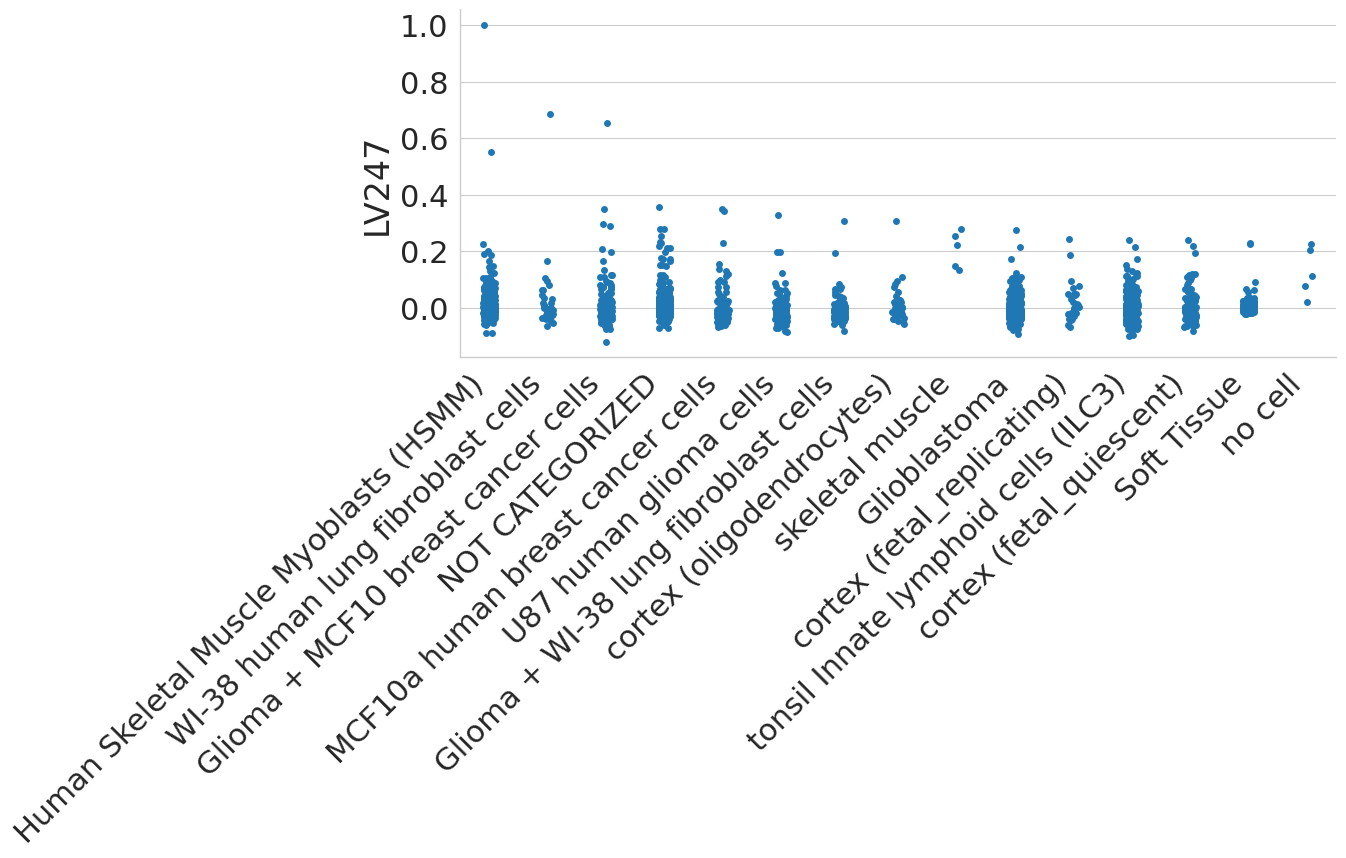

In [57]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [58]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [59]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("^NOT CATEGORIZED$")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV247
project   run                                  
SRP057248 SRR1976384  NOT CATEGORIZED  0.355341
SRP057205 SRR1975484  NOT CATEGORIZED  0.277670
          SRR1975483  NOT CATEGORIZED  0.277124
SRP025982 SRR1216131  NOT CATEGORIZED  0.254403
SRP007359 SRR299114   NOT CATEGORIZED  0.233843
SRP025982 SRR1216110  NOT CATEGORIZED  0.228889
          SRR1216130  NOT CATEGORIZED  0.218362
SRP042043 SRR1290421  NOT CATEGORIZED  0.209766
SRP025982 SRR1216132  NOT CATEGORIZED  0.209605
          SRR1216121  NOT CATEGORIZED  0.195765
SRP042043 SRR1290422  NOT CATEGORIZED  0.176403
SRP025982 SRR1216117  NOT CATEGORIZED  0.172408
          SRR1216111  NOT CATEGORIZED  0.171119
SRP057248 SRR1976386  NOT CATEGORIZED  0.165730
SRP058773 SRR2042612  NOT CATEGORIZED  0.150883
SRP025982 SRR1216118  NOT CATEGORIZED  0.150355
SRP058773 SRR2042622  NOT CATEGORIZED  0.148612
SRP015449 SRR557670   NOT CATEGORIZED  0.116494
SRP059775 SRR2074912  NOT CATEGORIZED  0.113709
SRP025982 SRR1216112  NOT CATEGORIZED  0.106815

In [61]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP057205"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

cell line gfp cd13 ssea4 tra160     LV247
project   run                                                    
SRP057205 SRR1975484  Detroit 551   -    -     +     NA  0.277670
          SRR1975483  Detroit 551   -    -     +     NA  0.277124
          SRR1975472  Detroit 551   +    +    NA     NA  0.070036
          SRR1975471  Detroit 551   +    +    NA     NA  0.069940
          SRR1975461  Detroit 551  NA   NA    NA     NA  0.053942
          SRR1975462  Detroit 551  NA   NA    NA     NA  0.053919
          SRR1975495  Detroit 551   +   NA     -      -  0.039305
          SRR1975496  Detroit 551   +   NA     -      -  0.039026
          SRR1975490  Detroit 551   +   NA     +      -  0.028152
          SRR1975489  Detroit 551   +   NA     +      -  0.027599
          SRR1975456  Detroit 551  NA   NA    NA     NA  0.025821
          SRR1975455  Detroit 551  NA   NA    NA     NA  0.025765
          SRR1975506  Detroit 551  NA   NA    NA     NA  0.020282
          SRR1975476  Detroit 551   +    -     -     NA  0.019787
          SRR1975475  Detroit 551   +    -     -     NA  0.019208
          SRR1975505  Detroit 551  NA   NA    NA     NA  0.017566
          SRR1975508  Detroit 551  NA   NA    NA     NA  0.017192
          SRR1975507  Detroit 551  NA   NA    NA     NA  0.011976
          SRR1975463           H1  NA   NA    NA     NA  0.010863
          SRR1975464           H1  NA   NA    NA     NA  0.010854
          SRR1975457  Detroit 551  NA   NA    NA     NA  0.004912
          SRR1975458  Detroit 551  NA   NA    NA     NA  0.004749
          SRR1975454  Detroit 551  NA   NA    NA     NA -0.004630
          SRR1975453  Detroit 551  NA   NA    NA     NA -0.004899
          SRR1975488  Detroit 551   -   NA     +      - -0.006804
          SRR1975487  Detroit 551   -   NA     +      - -0.007137
          SRR1975504  Detroit 551   -   NA     +      + -0.007139
          SRR1975503  Detroit 551   -   NA     +      + -0.007445
          SRR1975499  Detroit 551   -   NA     +      - -0.020734
          SRR1975500  Detroit 551   -   NA     +      - -0.020886
          SRR1975479  Detroit 551   +    +     +     NA -0.022314
          SRR1975480  Detroit 551   +    +     +     NA -0.022549
          SRR1975474  Detroit 551   +    +    NA     NA -0.022952
          SRR1975473  Detroit 551   +    +    NA     NA -0.023008
          SRR1975486  Detroit 551   +   NA     -      - -0.024184
          SRR1975485  Detroit 551   +   NA     -      - -0.024643
          SRR1975465           H9  NA   NA    NA     NA -0.024777
          SRR1975470  Detroit 551   +    -    NA     NA -0.024790
          SRR1975469  Detroit 551   +    -    NA     NA -0.024854
          SRR1975466           H9  NA   NA    NA     NA -0.025476
          SRR1975498  Detroit 551   +   NA     +      - -0.025994
          SRR1975497  Detroit 551   +   NA     +      - -0.026086
          SRR1975467         PGP1  NA   NA    NA     NA -0.028220
          SRR1975492  Detroit 551   -   NA     +      + -0.028648
          SRR1975491  Detroit 551   -   NA     +      + -0.028650
          SRR1975468         PGP1  NA   NA    NA     NA -0.028732
          SRR1975478  Detroit 551   +    +     -     NA -0.029348
          SRR1975477  Detroit 551   +    +     -     NA -0.029438
          SRR1975501  Detroit 551   -   NA     +      + -0.045124
          SRR1975502  Detroit 551   -   NA     +      + -0.045249
          SRR1975482  Detroit 551   +    -     +     NA -0.045904
          SRR1975481  Detroit 551   +    -     +     NA -0.046105
          SRR1975459  Detroit 551  NA   NA    NA     NA -0.051372
          SRR1975460  Detroit 551  NA   NA    NA     NA -0.051481
          SRR1975494  Detroit 551   -   NA     +      + -0.072126
          SRR1975493  Detroit 551   -   NA     +      + -0.072493

In [ ]:
_tmp["sirs outcomes"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )